In [1]:
# Assignment 16

# KNN : K-Nearest Neighbors

In [2]:
import pandas as pd

df = pd.read_csv('Zoo.csv')

df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df.shape

(101, 18)

In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
# checking for missing values

df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
# checking for duplicates

df.duplicated().sum()

np.int64(0)

<Axes: xlabel='type', ylabel='count'>

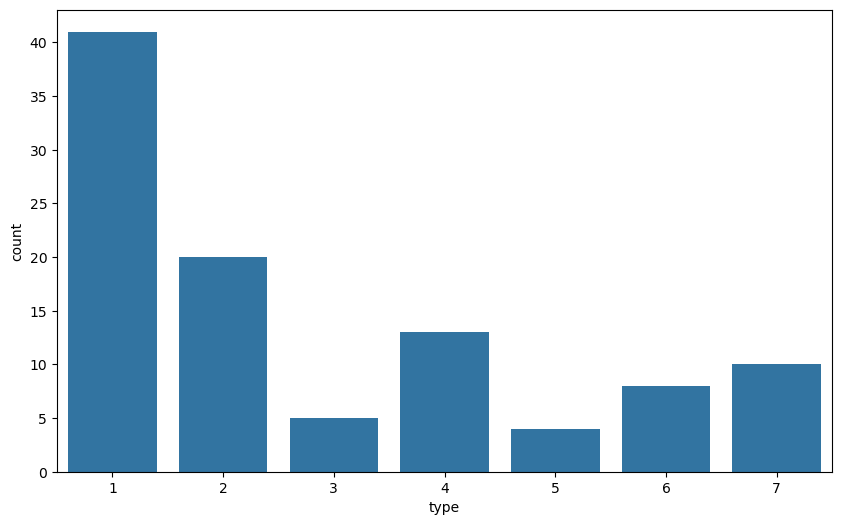

In [17]:
# visualization of target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)

In [19]:
# selecting independent variables & target variable

X = df.drop(['animal name','type'],axis=1)
y = df['type']

In [20]:
# train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=38)

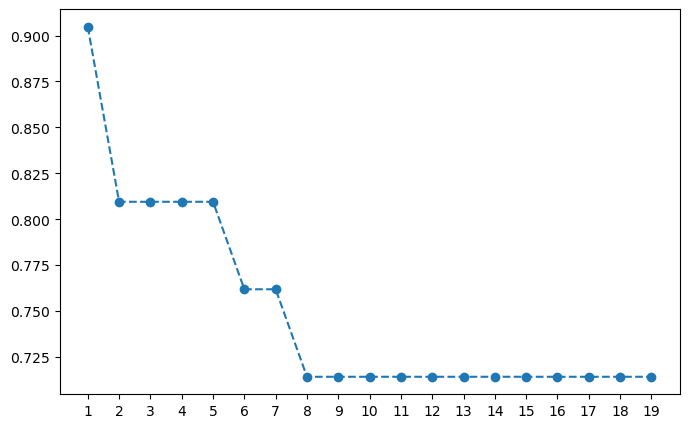

In [41]:
# finding optimal k-value

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 20)
accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    pred = knn.predict(X_test)

    accuracy.append(accuracy_score(y_test,pred))

plt.figure(figsize=(8,5))
plt.plot(k_values,accuracy, 'o--')
plt.xticks(range(1,20))
plt.show()
    

In [57]:
# with k = 6 & distance metric = euclidean

knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

print(f'accuracy score = {accuracy_score(y_test,pred)}')

print(f'report :\n{classification_report(y_test,pred,zero_division=0)}')

accuracy score = 0.7619047619047619
report :
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         0
           6       0.50      1.00      0.67         1
           7       1.00      0.33      0.50         3

    accuracy                           0.76        21
   macro avg       0.59      0.61      0.56        21
weighted avg       0.80      0.76      0.75        21



Text(0, 0.5, 'PC 2')

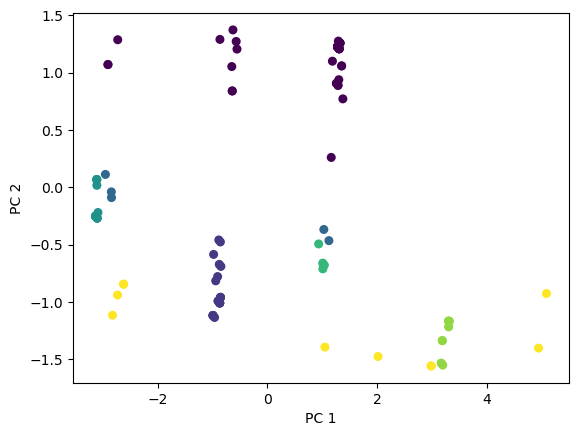

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

knn_pca = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn_pca.fit(X_pca, y)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=30)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [66]:
# with k = 6 & distance metric = manhattan

knn = KNeighborsClassifier(n_neighbors=6,metric='manhattan')
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

from sklearn.metrics import classification_report

print(f'accuracy score = {accuracy_score(y_test,pred)}')

print(f'report :\n{classification_report(y_test,pred,zero_division=0)}')

accuracy score = 0.8095238095238095
report :
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         0
           6       0.50      1.00      0.67         1
           7       1.00      0.33      0.50         3

    accuracy                           0.81        21
   macro avg       0.63      0.62      0.59        21
weighted avg       0.84      0.81      0.79        21



#### Interview Questions
<pre>
1. KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
   - n_neighbors = number of neighbors
    
   - weights = Weight function used in prediction 
               ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally
               ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away
    
   - algorithm {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’} (default=’auto’) : Algorithm used to compute the nearest neighbors
    
   - leaf_size (int, default=30) : Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree
    
   - metrics {'euclidean','manhattan','hamming'} (default=''euclidean'): Distance metric determines how the "closeness" between data points is calculated

2. - euclidean: It represents the straight-line distance between two points.

   - manhattan: This metric is often preferred for high-dimensional data, as it can be more robust than Euclidean distance.

   - hamming: This is the appropriate choice for categorical or binary data, as it counts the number of positions at which two data points differ.
</pre>  